In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK4 데이터/hourly_electricity.csv")

In [ ]:
df.info

<bound method DataFrame.info of          Unnamed: 0   power_usage  ...  categorical_day_of_week  categorical_hour
0             17544      2.538071  ...                        2                 0
1             17545      2.855330  ...                        2                 1
2             17546      2.855330  ...                        2                 2
3             17547      2.855330  ...                        2                 3
4             17548      2.538071  ...                        2                 4
...             ...           ...  ...                      ...               ...
2198067    10461482  20824.324324  ...                        6                19
2198068    10461483  19527.027027  ...                        6                20
2198069    10461484  20202.702703  ...                        6                21
2198070    10461485  19851.351351  ...                        6                22
2198071    10461486  20135.135135  ...                        6   

In [ ]:
df.sample(5)

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
2063078,9888568,10.172940,29310.0,1221,MT_348,2014-05-06 06:00:00,MT_348,6,6,1,5,29310.0,1,6
1392974,6243001,153.654595,30822.0,1284,MT_236,2014-07-08 06:00:00,MT_236,6,8,1,7,30822.0,1,6
293726,1202162,801.630435,32030.0,1334,MT_049,2014-08-27 14:00:00,MT_049,14,27,2,8,32030.0,2,14
1124614,4702351,1942.446043,26462.0,1102,MT_191,2014-01-07 14:00:00,MT_191,14,7,1,1,26462.0,1,14
2012251,9675625,156.959707,26483.0,1103,MT_340,2014-01-08 11:00:00,MT_340,11,8,2,1,26483.0,2,11


In [ ]:
df.tail()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
2198067,10461482,20824.324324,32299.0,1345,MT_370,2014-09-07 19:00:00,MT_370,19,7,6,9,32299.0,6,19
2198068,10461483,19527.027027,32300.0,1345,MT_370,2014-09-07 20:00:00,MT_370,20,7,6,9,32300.0,6,20
2198069,10461484,20202.702703,32301.0,1345,MT_370,2014-09-07 21:00:00,MT_370,21,7,6,9,32301.0,6,21
2198070,10461485,19851.351351,32302.0,1345,MT_370,2014-09-07 22:00:00,MT_370,22,7,6,9,32302.0,6,22
2198071,10461486,20135.135135,32303.0,1345,MT_370,2014-09-07 23:00:00,MT_370,23,7,6,9,32303.0,6,23


In [ ]:
df.head()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
0,17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
1,17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
2,17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
3,17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
4,17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4


#####Unnamed :0, &nbsp; power_usage ,&nbsp;t, &nbsp; days_from_start(1096부터 하루지날때마다 하나씩 더함), &nbsp; categorical_id(=id), &nbsp; date, &nbsp;id, &nbsp; hour, &nbsp; day &nbsp; 
#####day of the week(월요일이 0), &nbsp; month &nbsp; hours from start(id 하나가 진행한 시간=t), &nbsp;  categorical day of week(=day of the week) &nbsp; categorical_hour(=hour)
##### 같은 거 없애고 분석


In [ ]:
droplist = ['categorical_id', 'hours_from_start', 'categorical_day_of_week', 'categorical_hour']
df.drop(columns = droplist)

,Unnamed: 0,power_usage,t,days_from_start,date,id,hour,day,day_of_week,month
0,17544,2.538071,26304.0,1096,2014-01-01 00:00:00,MT_001,0,1,2,1
1,17545,2.855330,26305.0,1096,2014-01-01 01:00:00,MT_001,1,1,2,1
2,17546,2.855330,26306.0,1096,2014-01-01 02:00:00,MT_001,2,1,2,1
3,17547,2.855330,26307.0,1096,2014-01-01 03:00:00,MT_001,3,1,2,1
4,17548,2.538071,26308.0,1096,2014-01-01 04:00:00,MT_001,4,1,2,1
...,...,...,...,...,...,...,...,...,...,...
2198067,10461482,20824.324324,32299.0,1345,2014-09-07 19:00:00,MT_370,19,7,6,9
2198068,10461483,19527.027027,32300.0,1345,2014-09-07 20:00:00,MT_370,20,7,6,9
2198069,10461484,20202.702703,32301.0,1345,2014-09-07 21:00:00,MT_370,21,7,6,9
2198070,10461485,19851.351351,32302.0,1345,2014-09-07 22:00:00,MT_370,22,7,6,9


In [ ]:
df['power_usage'].unique()

array([2.53807107e+00, 2.85532995e+00, 2.85532995e+00, ...,
       2.14459459e+04, 2.26621622e+04, 2.37297297e+04])

In [ ]:
df['t'].unique()

array([26304., 26305., 26306., ..., 32301., 32302., 32303.])

In [ ]:
df['id'].unique()

array(['MT_001', 'MT_002', 'MT_003', 'MT_004', 'MT_005', 'MT_006',
       'MT_007', 'MT_008', 'MT_009', 'MT_010', 'MT_011', 'MT_012',
       'MT_013', 'MT_014', 'MT_015', 'MT_016', 'MT_017', 'MT_018',
       'MT_019', 'MT_020', 'MT_021', 'MT_022', 'MT_023', 'MT_024',
       'MT_025', 'MT_026', 'MT_027', 'MT_028', 'MT_029', 'MT_030',
       'MT_031', 'MT_032', 'MT_033', 'MT_034', 'MT_035', 'MT_036',
       'MT_037', 'MT_038', 'MT_039', 'MT_040', 'MT_041', 'MT_042',
       'MT_043', 'MT_044', 'MT_045', 'MT_046', 'MT_047', 'MT_048',
       'MT_049', 'MT_050', 'MT_051', 'MT_052', 'MT_053', 'MT_054',
       'MT_055', 'MT_056', 'MT_057', 'MT_058', 'MT_059', 'MT_060',
       'MT_061', 'MT_062', 'MT_063', 'MT_064', 'MT_065', 'MT_066',
       'MT_067', 'MT_068', 'MT_069', 'MT_070', 'MT_071', 'MT_072',
       'MT_073', 'MT_074', 'MT_075', 'MT_076', 'MT_077', 'MT_078',
       'MT_079', 'MT_080', 'MT_081', 'MT_082', 'MT_083', 'MT_084',
       'MT_085', 'MT_086', 'MT_087', 'MT_088', 'MT_089', 'MT_0

In [ ]:
df['id'].value_counts()

MT_125    6000
MT_028    6000
MT_021    6000
MT_188    6000
MT_225    6000
          ... 
MT_109    4848
MT_116    4848
MT_181    4488
MT_133    4280
MT_178    1248
Name: id, Length: 369, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


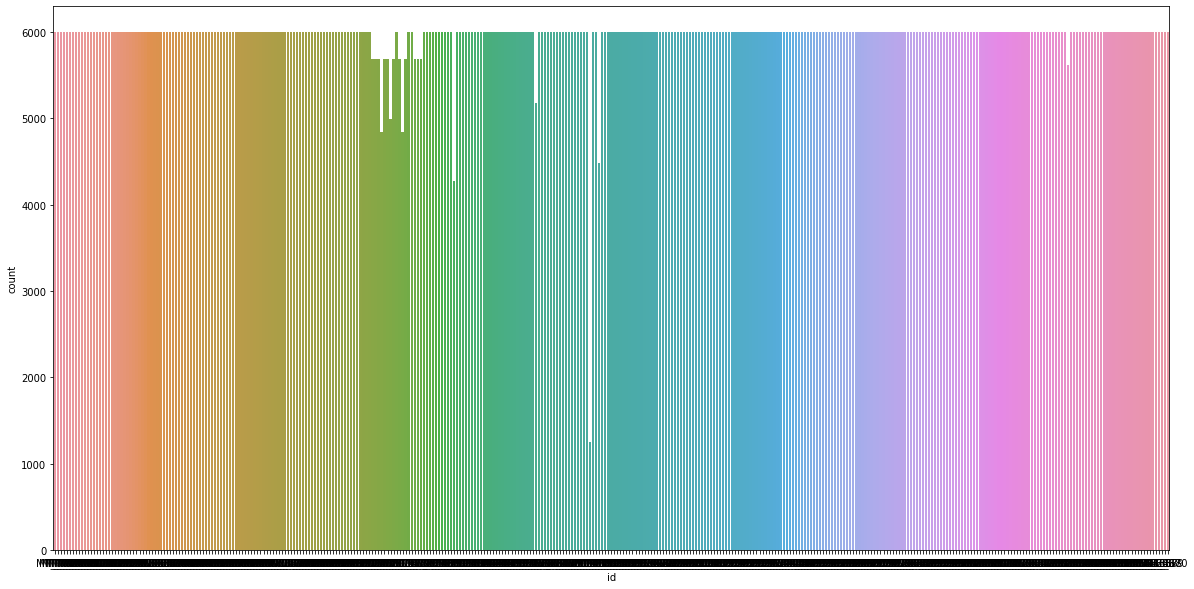

In [ ]:
# 1 id당 대략 250일 정도 사용
plt.figure(figsize= (20,10))
sns.countplot(df['id'])

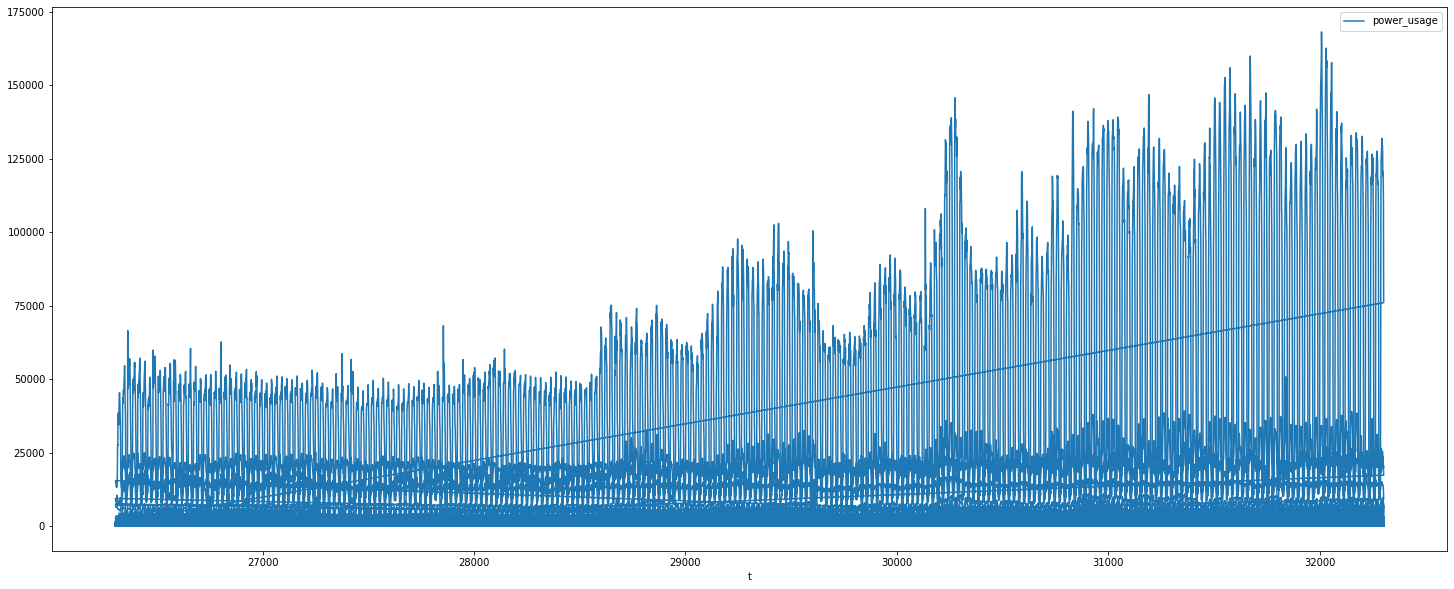

In [ ]:
df.plot(x = 't', y= 'power_usage', figsize=(25,10), kind= 'line')

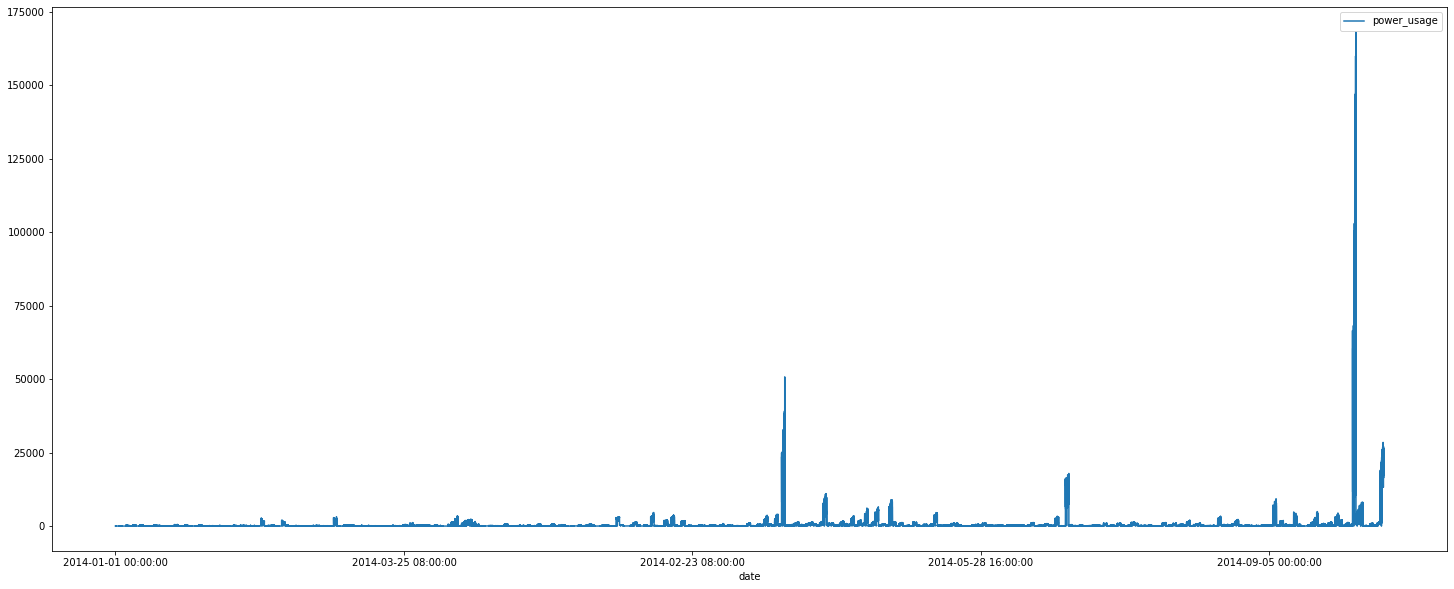

In [ ]:
df.plot(x = 'date', y= 'power_usage', figsize=(25,10))

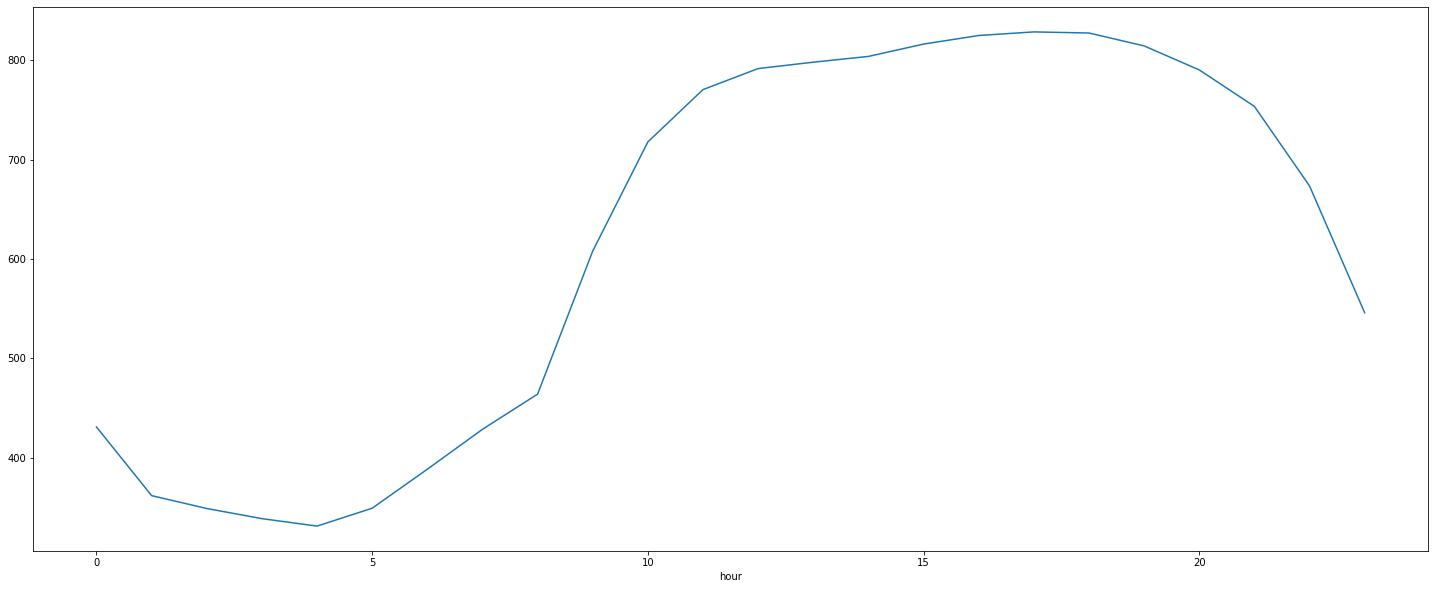

In [ ]:
df.groupby(['hour'])['power_usage'].mean().plot(figsize=(25,10))

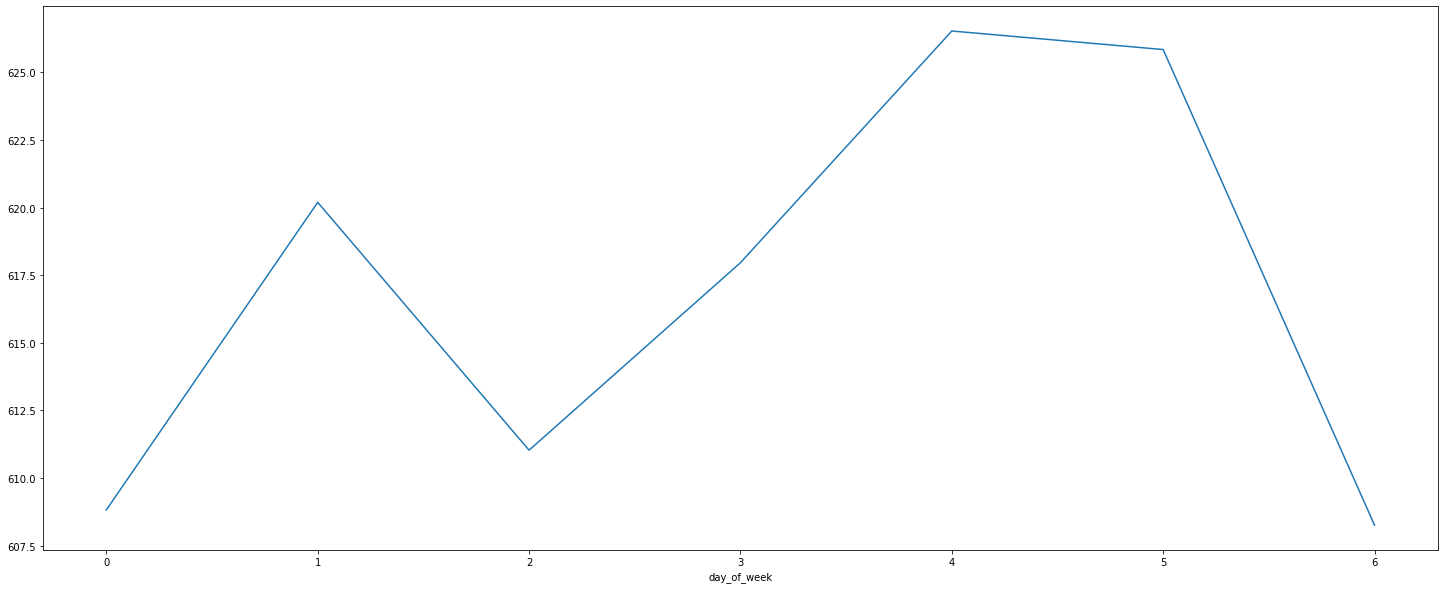

In [ ]:
df.groupby(['day_of_week'])['power_usage'].mean().plot(figsize=(25,10))

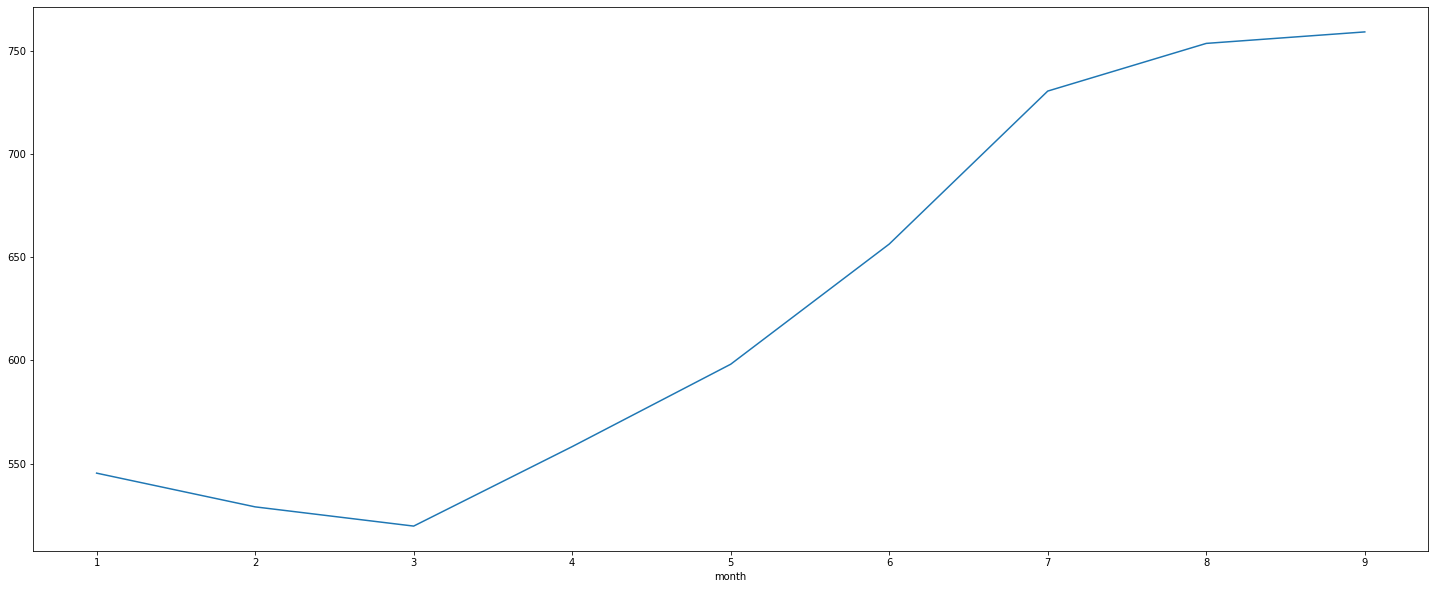

In [ ]:
df.groupby(['month'])['power_usage'].mean().plot(figsize=(25,10))

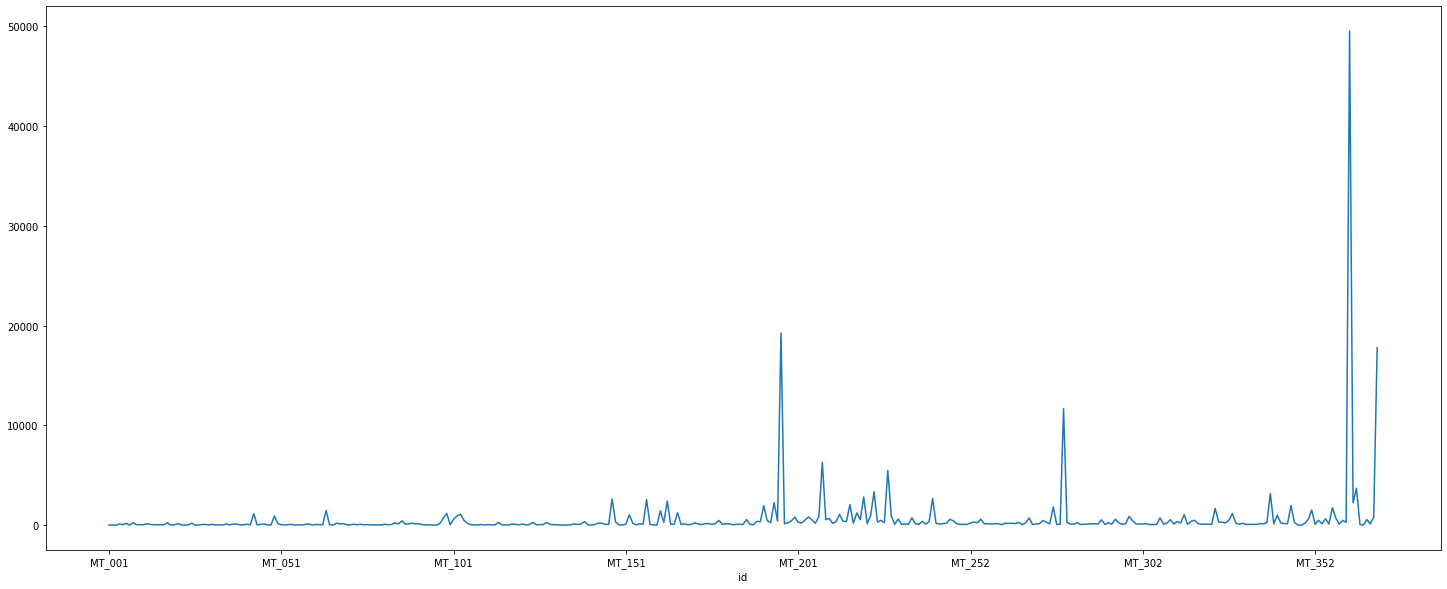

In [ ]:
df.groupby(['id'])['power_usage'].mean().plot(figsize=(25,10))

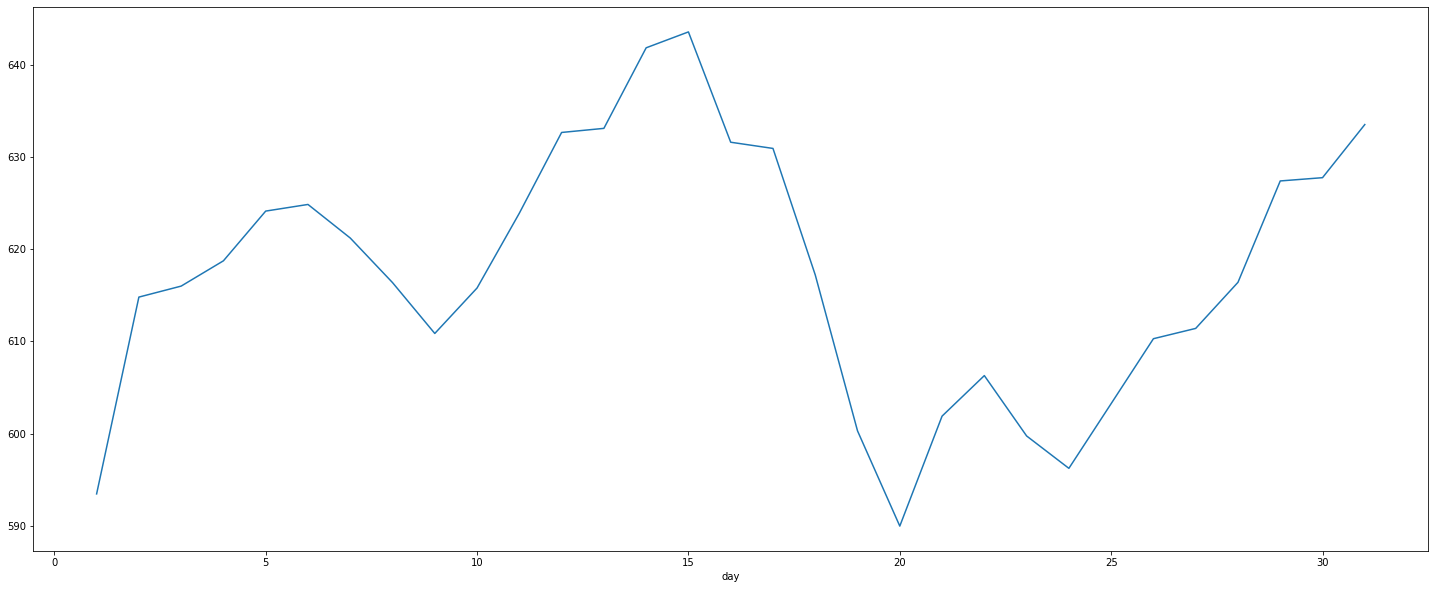

In [ ]:
df.groupby(['day'])['power_usage'].mean().plot(figsize=(25,10)) 

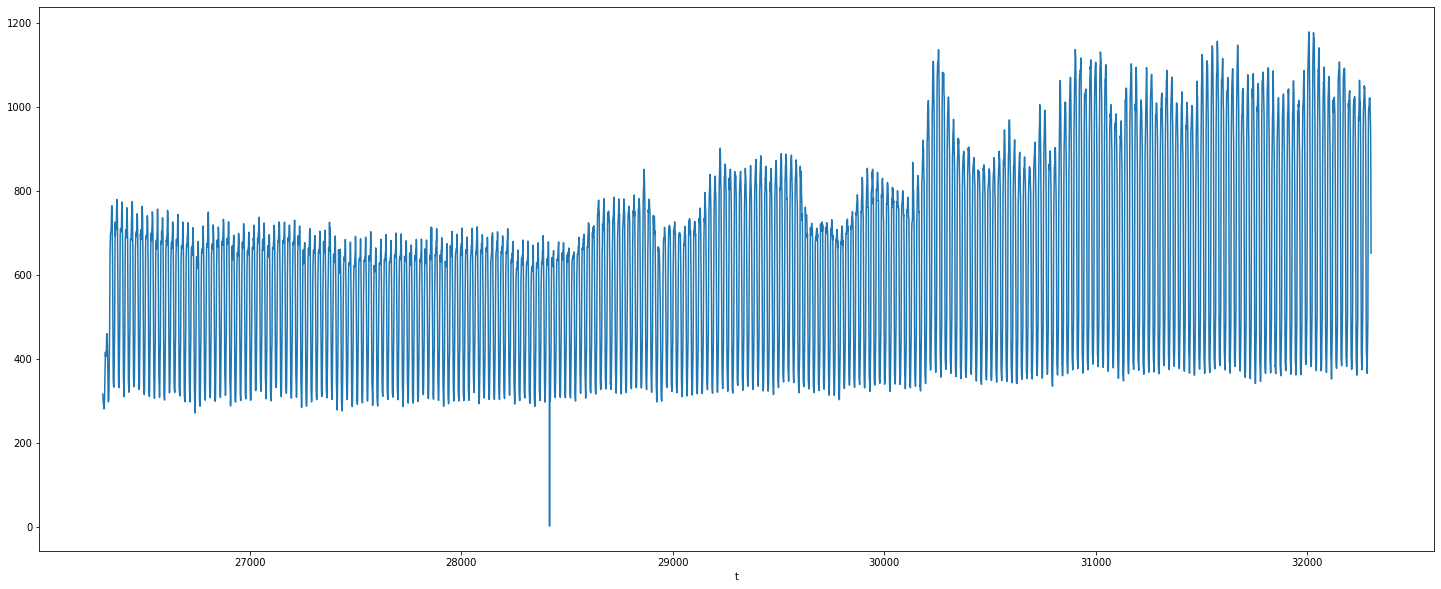

In [ ]:
df.groupby(['t'])['power_usage'].mean().plot(figsize=(25,10))

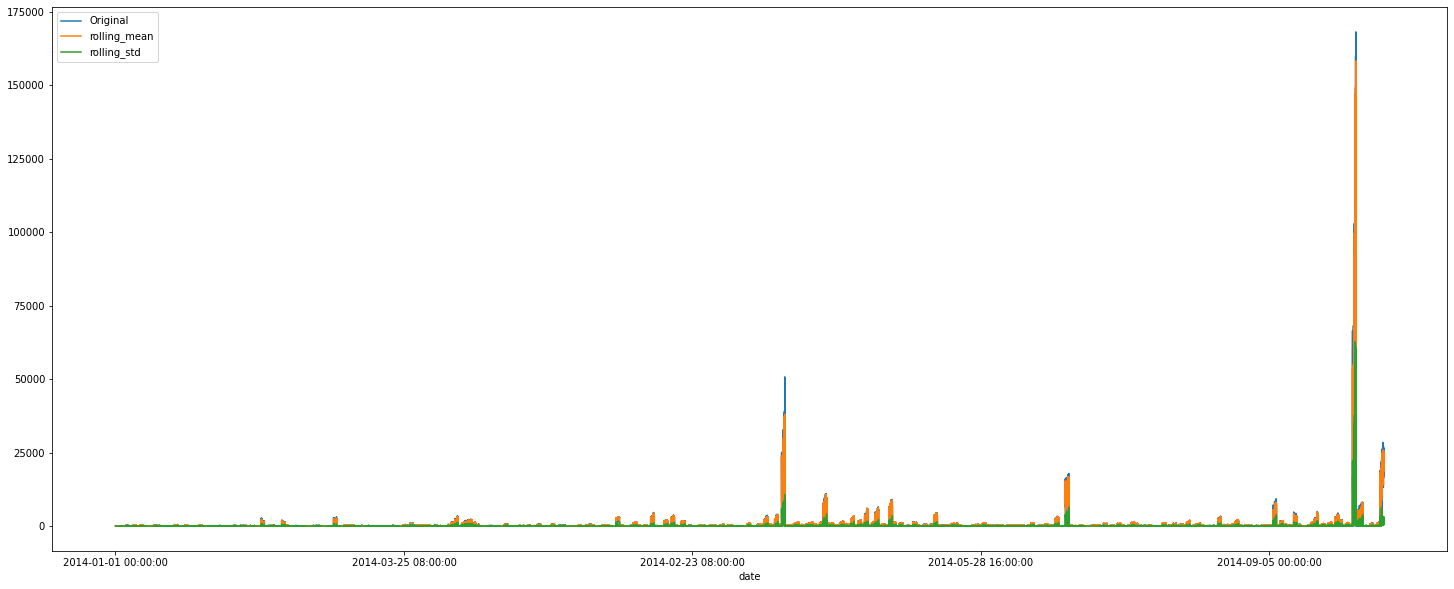

In [ ]:
ts = df.set_index('date')['power_usage']
plt.figure(figsize=(25,10))
ts.plot(label='Original', legend=True)
ts.rolling(6).mean().plot(legend=True, label='rolling_mean')
ts.rolling(6).std().plot(legend=True, label='rolling_std')

In [ ]:
# https://getchan.github.io/data/EDA_Time_Series/#time-series-prediction-with-arima

# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
# Dickey-Fuller test
result = adfuller(ts, autolag='AIC')
print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
